<a href="https://colab.research.google.com/github/SophiaAnnCh/IO_ML/blob/main/simple_linear_regression(Assignment_1)(trial).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('SwedishMotorInsurance.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
print(dataset.head())

   Kilometres  Zone  Bonus  Make  Insured  Claims  Payment
0           1     1      1     1   455.13     108   392491
1           1     1      1     2    69.17      19    46221
2           1     1      1     3    72.88      13    15694
3           1     1      1     4  1292.39     124   422201
4           1     1      1     5   191.01      40   119373


In [5]:
print(dataset.describe())

        Kilometres         Zone        Bonus         Make        Insured  \
count  2182.000000  2182.000000  2182.000000  2182.000000    2182.000000   
mean      2.985793     3.970211     4.015124     4.991751    1092.195270   
std       1.410409     1.988858     2.000516     2.586943    5661.156245   
min       1.000000     1.000000     1.000000     1.000000       0.010000   
25%       2.000000     2.000000     2.000000     3.000000      21.610000   
50%       3.000000     4.000000     4.000000     5.000000      81.525000   
75%       4.000000     6.000000     6.000000     7.000000     389.782500   
max       5.000000     7.000000     7.000000     9.000000  127687.270000   

            Claims       Payment  
count  2182.000000  2.182000e+03  
mean     51.865720  2.570076e+05  
std     201.710694  1.017283e+06  
min       0.000000  0.000000e+00  
25%       1.000000  2.988750e+03  
50%       5.000000  2.740350e+04  
75%      21.000000  1.119538e+05  
max    3338.000000  1.824503e+07  


In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:, 5:7])
x[:, 5:7] = imputer.transform(x[:, 5:7])

In [8]:
from tables.table import Column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [9]:
x

array([[  1.  ,   0.  ,   0.  , ...,   1.  , 455.13, 108.  ],
       [  1.  ,   0.  ,   0.  , ...,   2.  ,  69.17,  19.  ],
       [  1.  ,   0.  ,   0.  , ...,   3.  ,  72.88,  13.  ],
       ...,
       [  0.  ,   0.  ,   0.  , ...,   7.  ,   2.83,   1.  ],
       [  0.  ,   0.  ,   0.  , ...,   8.  ,  13.06,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   9.  , 384.87,  16.  ]])

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [50]:
y

array([[1515],
       [ 881],
       [ 559],
       ...,
       [  32],
       [   0],
       [1208]])

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [53]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
prediction = lin_reg.predict(x_test)
print(prediction)

[[ 676.24869082]
 [ 269.72521863]
 [ 163.67773102]
 [ 613.65776754]
 [ 474.27755878]
 [ 646.8624064 ]
 [ 671.23717177]
 [ 318.30722328]
 [ 922.84663546]
 [ 660.49351014]
 [ 500.6464205 ]
 [ 373.21766504]
 [ 479.72000021]
 [ 690.75562572]
 [ 213.14758729]
 [ 432.03393816]
 [ 603.04396623]
 [ 947.86344653]
 [ 721.70859356]
 [ 858.22499484]
 [ 988.33830478]
 [ 517.85240357]
 [ 581.0822602 ]
 [ 392.66326719]
 [ 934.48186639]
 [ 441.96453123]
 [ 536.69281521]
 [ 314.31974748]
 [1010.61548023]
 [ 455.5916271 ]
 [ 463.14434092]
 [ 951.23830033]
 [ 964.97435294]
 [ 686.16423745]
 [ 857.14412904]
 [ 335.81930111]
 [ 961.04401695]
 [ 368.5504016 ]
 [1029.67353609]
 [1157.98785379]
 [ 609.29450537]
 [ 476.53162918]
 [ 879.69598479]
 [2819.0827019 ]
 [ 506.90351623]
 [ 724.10503176]
 [ 922.9985177 ]
 [ 665.3808357 ]
 [1294.74305525]
 [ 610.98110904]
 [ 291.1024504 ]
 [  56.7236531 ]
 [1061.26064828]
 [ 763.48635974]
 [ 868.27659304]
 [ 939.8330145 ]
 [1030.5096296 ]
 [ 768.74316601]
 [ 974.0489226

In [54]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, prediction)

399.872647995912

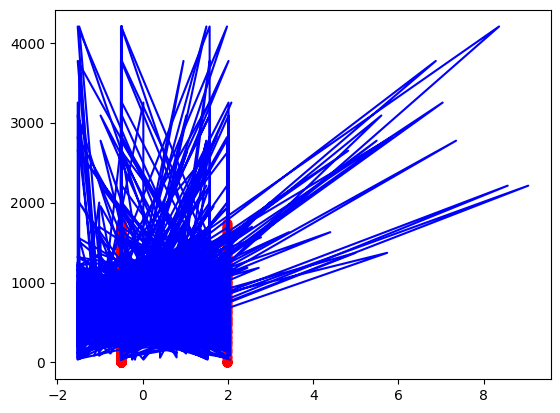

In [60]:
plt.scatter(x_train[:, 0], y_train, color='red', alpha=0.5)
plt.plot(x_test, lin_reg.predict(x_test), color='blue')
plt.show()


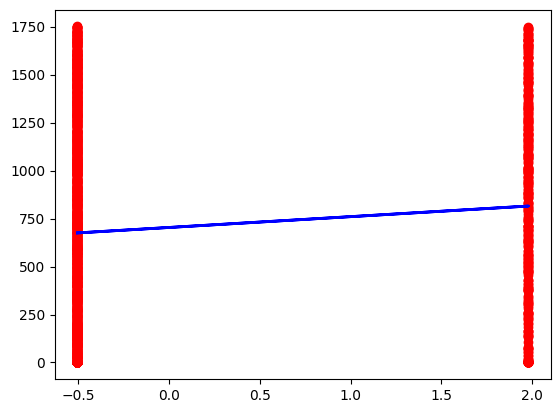

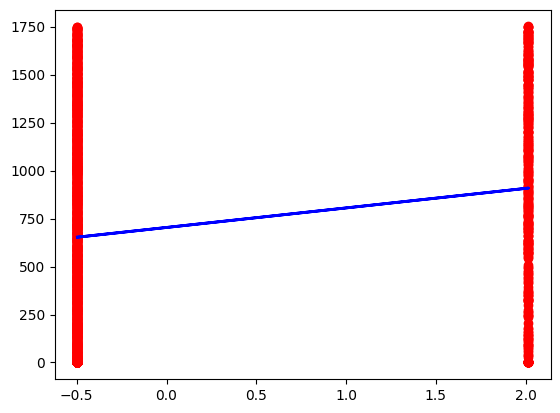

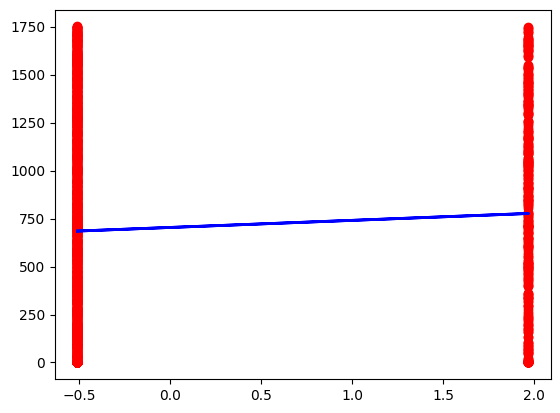

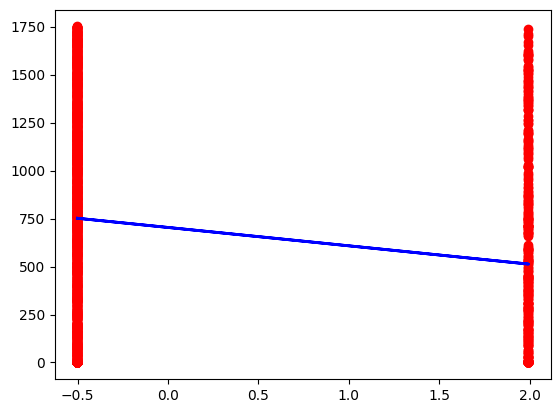

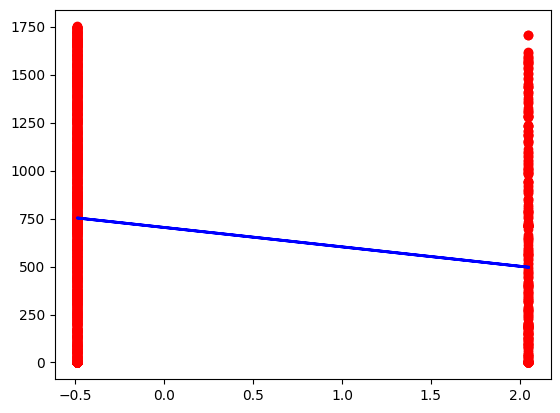

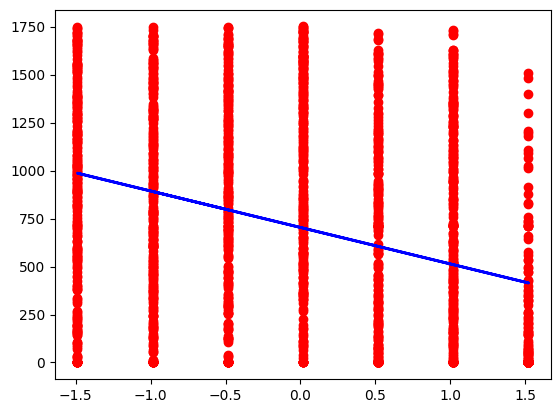

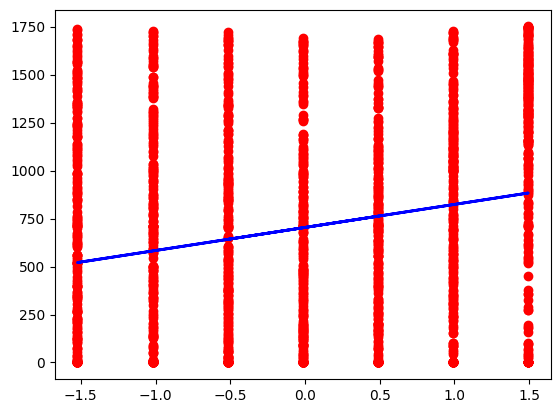

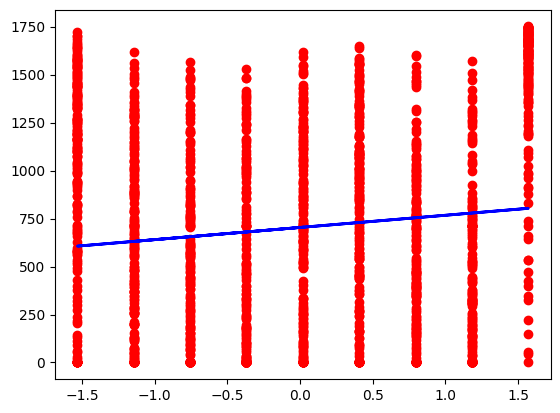

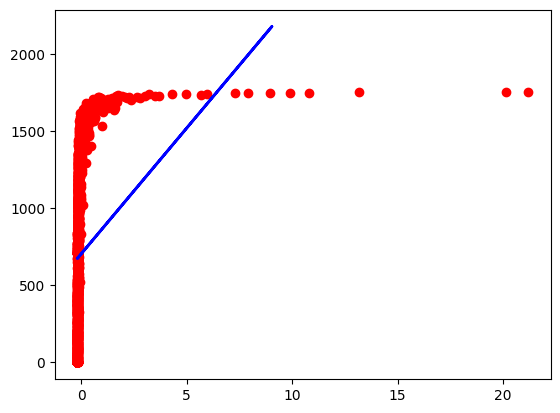

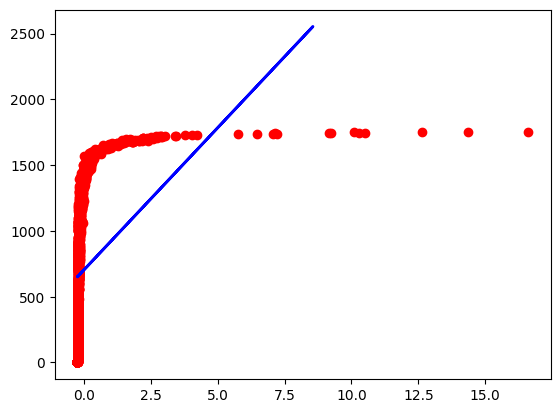

In [79]:
feature_column_index = 0
lin_reg = LinearRegression()
lin_reg.fit(x_train[:, [feature_column_index]], y_train)
prediction = lin_reg.predict(x_test[:, [feature_column_index]])
plt.scatter(x_train[:, feature_column_index], y_train, color='red')
plt.plot(x_test[:, feature_column_index], prediction, color='blue', linewidth=2)
plt.show()

feature_column_index = 1
lin_reg = LinearRegression()
lin_reg.fit(x_train[:, [feature_column_index]], y_train)
prediction = lin_reg.predict(x_test[:, [feature_column_index]])
plt.scatter(x_train[:, feature_column_index], y_train, color='red')
plt.plot(x_test[:, feature_column_index], prediction, color='blue', linewidth=2)
plt.show()

feature_column_index = 2
lin_reg = LinearRegression()
lin_reg.fit(x_train[:, [feature_column_index]], y_train)
prediction = lin_reg.predict(x_test[:, [feature_column_index]])
plt.scatter(x_train[:, feature_column_index], y_train, color='red')
plt.plot(x_test[:, feature_column_index], prediction, color='blue', linewidth=2)
plt.show()

feature_column_index = 3
lin_reg = LinearRegression()
lin_reg.fit(x_train[:, [feature_column_index]], y_train)
prediction = lin_reg.predict(x_test[:, [feature_column_index]])
plt.scatter(x_train[:, feature_column_index], y_train, color='red')
plt.plot(x_test[:, feature_column_index], prediction, color='blue', linewidth=2)
plt.show()

feature_column_index = 4
lin_reg = LinearRegression()
lin_reg.fit(x_train[:, [feature_column_index]], y_train)
prediction = lin_reg.predict(x_test[:, [feature_column_index]])
plt.scatter(x_train[:, feature_column_index], y_train, color='red')
plt.plot(x_test[:, feature_column_index], prediction, color='blue', linewidth=2)
plt.show()

feature_column_index = 5
lin_reg = LinearRegression()
lin_reg.fit(x_train[:, [feature_column_index]], y_train)
prediction = lin_reg.predict(x_test[:, [feature_column_index]])
plt.scatter(x_train[:, feature_column_index], y_train, color='red')
plt.plot(x_test[:, feature_column_index], prediction, color='blue', linewidth=2)
plt.show()

feature_column_index = 6
lin_reg = LinearRegression()
lin_reg.fit(x_train[:, [feature_column_index]], y_train)
prediction = lin_reg.predict(x_test[:, [feature_column_index]])
plt.scatter(x_train[:, feature_column_index], y_train, color='red')
plt.plot(x_test[:, feature_column_index], prediction, color='blue', linewidth=2)
plt.show()

feature_column_index = 7
lin_reg = LinearRegression()
lin_reg.fit(x_train[:, [feature_column_index]], y_train)
prediction = lin_reg.predict(x_test[:, [feature_column_index]])
plt.scatter(x_train[:, feature_column_index], y_train, color='red')
plt.plot(x_test[:, feature_column_index], prediction, color='blue', linewidth=2)
plt.show()

feature_column_index = 8
lin_reg = LinearRegression()
lin_reg.fit(x_train[:, [feature_column_index]], y_train)
prediction = lin_reg.predict(x_test[:, [feature_column_index]])
plt.scatter(x_train[:, feature_column_index], y_train, color='red')
plt.plot(x_test[:, feature_column_index], prediction, color='blue', linewidth=2)
plt.show()

feature_column_index = 9
lin_reg = LinearRegression()
lin_reg.fit(x_train[:, [feature_column_index]], y_train)
prediction = lin_reg.predict(x_test[:, [feature_column_index]])
plt.scatter(x_train[:, feature_column_index], y_train, color='red')
plt.plot(x_test[:, feature_column_index], prediction, color='blue', linewidth=2)
plt.show()